## **Note!**

Make sure you install pygame in your terminal: \
pip install pygame

## **Prototype 3 - Algorithms Comparison**

Comparison between A*, Dijkstra, Greedy, and BFS. The screen is split into 4 with every screen demonstrate different searching path algorithm. You can modify the environment on one of these screens and the effect will be applied to all the screens.

**To test it, run the code**

In [ ]:
import pygame
import random
import heapq
import sys
from collections import deque

# Constants
WIDTH, HEIGHT = 1600, 1200
CELL_SIZE = 20
ROWS = HEIGHT // CELL_SIZE // 2
COLS = WIDTH // CELL_SIZE // 2

# Colors
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
RED = (255, 0, 0)
GREEN = (0, 255, 0)
BLUE = (0, 0, 255)
YELLOW = (255, 255, 0)
ORANGE = (255, 165, 0)

# Initialize Pygame
pygame.init()
info = pygame.display.Info()
WIDTH, HEIGHT = info.current_w, info.current_h
#screen = pygame.display.set_mode((WIDTH, HEIGHT)) ###

CELL_SIZE = 20
ROWS = HEIGHT // CELL_SIZE // 2  # Adjust for split screen
COLS = WIDTH // CELL_SIZE // 2

# Existing code remains unchanged except for screen initialization
screen = pygame.display.set_mode((WIDTH, HEIGHT), pygame.RESIZABLE)  # Allow resizing
pygame.display.set_caption("Algorithm Comparison")
clock = pygame.time.Clock()
# Add a dynamic font scaling feature if needed
font = pygame.font.SysFont(None, min(WIDTH, HEIGHT) // 30)

def generate_maze(rows, cols):
    while True:
        maze = [[1 for _ in range(cols)] for _ in range(rows)]
        start = (random.randint(0, rows-1), random.randint(0, cols-1))
        end = start
        while end == start:
            end = (random.randint(0, rows-1), random.randint(0, cols-1))

        # Modified DFS maze generation with multiple paths
        stack = [start]
        maze[start[0]][start[1]] = 0
        directions = [(-1,0),(1,0),(0,-1),(0,1)]

        while stack:
            current = stack[-1]
            neighbors = []
            for dx, dy in directions:
                nx, ny = current[0]+dx*2, current[1]+dy*2
                if 0 <= nx < rows and 0 <= ny < cols and maze[nx][ny] == 1:
                    neighbors.append((nx, ny))

            if neighbors:
                next_cell = random.choice(neighbors)
                wall = (current[0]+(next_cell[0]-current[0])//2,
                        current[1]+(next_cell[1]-current[1])//2)

                # 30% chance to create alternative path
                if random.random() < 0.3 and maze[wall[0]][wall[1]] == 1:
                    maze[wall[0]][wall[1]] = 0
                    maze[next_cell[0]][next_cell[1]] = 0
                    stack.append(next_cell)
                else:
                    # Regular path creation
                    maze[wall[0]][wall[1]] = 0
                    maze[next_cell[0]][next_cell[1]] = 0
                    stack.append(next_cell)
            else:
                stack.pop()

        # Add random connections for more alternative paths
        for _ in range(rows * cols // 10):
            x = random.randint(1, rows-2)
            y = random.randint(1, cols-2)
            if maze[x][y] == 1:
                maze[x][y] = 0

        # Ensure there's at least one valid path
        if astar(maze, start, end):
            return maze, start, end

def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def get_neighbors(maze, pos):
    neighbors = []
    for dx, dy in [(-1,0),(1,0),(0,-1),(0,1)]:
        nx, ny = pos[0]+dx, pos[1]+dy
        if 0 <= nx < ROWS and 0 <= ny < COLS:
            if maze[nx][ny] == 0:
                neighbors.append((nx, ny))
    return neighbors

# Pathfinding Algorithms
def astar(maze, start, end):
    open_set = []
    heapq.heappush(open_set, (0, start))
    came_from = {}
    g_score = { (r, c): float('inf') for r in range(ROWS) for c in range(COLS) }
    g_score[start] = 0
    f_score = { (r, c): float('inf') for r in range(ROWS) for c in range(COLS) }
    f_score[start] = heuristic(start, end)

    while open_set:
        current = heapq.heappop(open_set)[1]

        if current == end:
            return reconstruct_path(came_from, current)

        for neighbor in get_neighbors(maze, current):
            tentative_g = g_score[current] + 1
            if tentative_g < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g
                f_score[neighbor] = tentative_g + heuristic(neighbor, end)
                if neighbor not in [i[1] for i in open_set]:
                    heapq.heappush(open_set, (f_score[neighbor], neighbor))

    return None

def bfs(maze, start, end):
    queue = deque([start])
    came_from = {}
    visited = set()
    visited.add(start)

    while queue:
        current = queue.popleft()

        if current == end:
            return reconstruct_path(came_from, current)

        for neighbor in get_neighbors(maze, current):
            if neighbor not in visited:
                visited.add(neighbor)
                came_from[neighbor] = current
                queue.append(neighbor)

    return None

def greedy(maze, start, end):
    open_set = []
    heapq.heappush(open_set, (heuristic(start, end), start))
    came_from = {}
    visited = set()
    visited.add(start)

    while open_set:
        current = heapq.heappop(open_set)[1]

        if current == end:
            return reconstruct_path(came_from, current)

        for neighbor in get_neighbors(maze, current):
            if neighbor not in visited:
                visited.add(neighbor)
                came_from[neighbor] = current
                heapq.heappush(open_set, (heuristic(neighbor, end), neighbor))

    return None

def dijkstra(maze, start, end):
    open_set = []
    heapq.heappush(open_set, (0, start))
    came_from = {}
    g_score = { (r, c): float('inf') for r in range(ROWS) for c in range(COLS) }
    g_score[start] = 0

    while open_set:
        current = heapq.heappop(open_set)[1]

        if current == end:
            return reconstruct_path(came_from, current)

        for neighbor in get_neighbors(maze, current):
            tentative_g = g_score[current] + 1
            if tentative_g < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g
                if neighbor not in [i[1] for i in open_set]:
                    heapq.heappush(open_set, (g_score[neighbor], neighbor))

    return None

def reconstruct_path(came_from, current):
    path = [current]
    while current in came_from:
        current = came_from[current]
        path.append(current)
    return path[::-1]

class AnimationController:
    def __init__(self):
        self.speed = 100  # ms per step
        self.last_update = pygame.time.get_ticks()
        self.paused = False

    def should_update(self):
        if not self.paused:
            now = pygame.time.get_ticks()
            if now - self.last_update > self.speed:
                self.last_update = now
                return True
        return False

def main():
    maze, start, end = generate_maze(ROWS, COLS)
    algorithms = {"A*": astar, "Dijkstra": dijkstra, "Greedy": greedy, "BFS": bfs}
    animator = AnimationController()

    results = {}
    for name, algo in algorithms.items():
        path = algo(maze, start, end)
        results[name] = {
            "path": path,
            "step": 0,
            "current_pos": start,
            "completed": False
        }

    running = True
    while running:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False
            elif event.type == pygame.MOUSEBUTTONDOWN:
                handle_mouse_click(event, maze, start, end, algorithms, results)
            elif event.type == pygame.KEYDOWN:
                if event.key == pygame.K_SPACE:
                    animator.paused = not animator.paused
                elif event.key == pygame.K_r:  # Reset agents in current maze
                    update_paths(algorithms, maze, start, end, results)
                elif event.key == pygame.K_t:  # Generate new maze
                    maze, start, end = generate_maze(ROWS, COLS)
                    update_paths(algorithms, maze, start, end, results)

        screen.fill(WHITE)

        if animator.should_update():
            update_animation_steps(results)

        draw_grid(maze, start, end, results)
        pygame.display.flip()
        clock.tick(30)

    pygame.quit()
    sys.exit()

def handle_mouse_click(event, maze, start, end, algorithms, results):
    x, y = pygame.mouse.get_pos()
    quadrant_width = WIDTH // 2
    quadrant_height = HEIGHT // 2

    col = (x % quadrant_width) // CELL_SIZE
    row = (y % quadrant_height) // CELL_SIZE

    if 0 <= row < ROWS and 0 <= col < COLS:
        if (row, col) == start or (row, col) == end:
            return

        if event.button == 1:  # Left click adds wall
            maze[row][col] = 1
        elif event.button == 3:  # Right click removes wall
            maze[row][col] = 0

        # Update paths from current positions
        for name in algorithms:
            current_pos = results[name]["current_pos"]
            if maze[current_pos[0]][current_pos[1]] == 1:
                current_pos = start  # Reset if current position is blocked
            new_path = algorithms[name](maze, current_pos, end)
            results[name]["path"] = new_path
            results[name]["step"] = 0
            results[name]["current_pos"] = current_pos
            results[name]["completed"] = False

def update_paths(algorithms, maze, start, end, results):
    for name, algo in algorithms.items():
        new_path = algo(maze, start, end)
        results[name] = {
            "path": new_path,
            "step": 0,
            "current_pos": start,
            "completed": False
        }

def update_animation_steps(results):
    for name in results:
        if results[name]["path"] and not results[name]["completed"]:
            results[name]["step"] += 1
            if results[name]["step"] >= len(results[name]["path"]):
                results[name]["completed"] = True
                results[name]["step"] = len(results[name]["path"]) - 1
            else:
                results[name]["current_pos"] = results[name]["path"][results[name]["step"]]

def draw_grid(maze, start, end, results):
    for i, (name, data) in enumerate(results.items()):
        quadrant_x = (i % 2) * (WIDTH // 2)
        quadrant_y = (i // 2) * (HEIGHT // 2)

        # Draw maze
        for row in range(ROWS):
            for col in range(COLS):
                color = BLACK if maze[row][col] == 1 else WHITE
                rect = (quadrant_x + col*CELL_SIZE, quadrant_y + row*CELL_SIZE, CELL_SIZE, CELL_SIZE)
                pygame.draw.rect(screen, color, rect)

        # Draw start/end
        pygame.draw.rect(screen, GREEN, (quadrant_x + start[1]*CELL_SIZE,
                         quadrant_y + start[0]*CELL_SIZE, CELL_SIZE, CELL_SIZE))
        pygame.draw.rect(screen, BLUE, (quadrant_x + end[1]*CELL_SIZE,
                        quadrant_y + end[0]*CELL_SIZE, CELL_SIZE, CELL_SIZE))

        # Draw path and agent
        if data["path"]:
            # Draw remaining path
            if data["step"] < len(data["path"]):
                remaining_path = data["path"][data["step"]:]
                for pos in remaining_path:
                    x = quadrant_x + pos[1]*CELL_SIZE + CELL_SIZE//2
                    y = quadrant_y + pos[0]*CELL_SIZE + CELL_SIZE//2
                    pygame.draw.circle(screen, ORANGE, (x, y), 4)

            # Draw agent
            current_pos = data["current_pos"]
            x = quadrant_x + current_pos[1]*CELL_SIZE + CELL_SIZE//2
            y = quadrant_y + current_pos[0]*CELL_SIZE + CELL_SIZE//2
            pygame.draw.circle(screen, RED, (x, y), 8)
        else:
            # No path message
            text = font.render("No Path!", True, RED)
            text_rect = text.get_rect(center=(quadrant_x + (COLS*CELL_SIZE)//2,
                                            quadrant_y + (ROWS*CELL_SIZE)//2))
            screen.blit(text, text_rect)

        # Draw algorithm name and status with color coding
        status_color = GREEN if data["completed"] else RED
        status = "Completed!" if data["completed"] else "In Progress"
        text = font.render(f"{name} - {status}", True, status_color)
        screen.blit(text, (quadrant_x + 10, quadrant_y + 10))

if __name__ == "__main__":
    main()

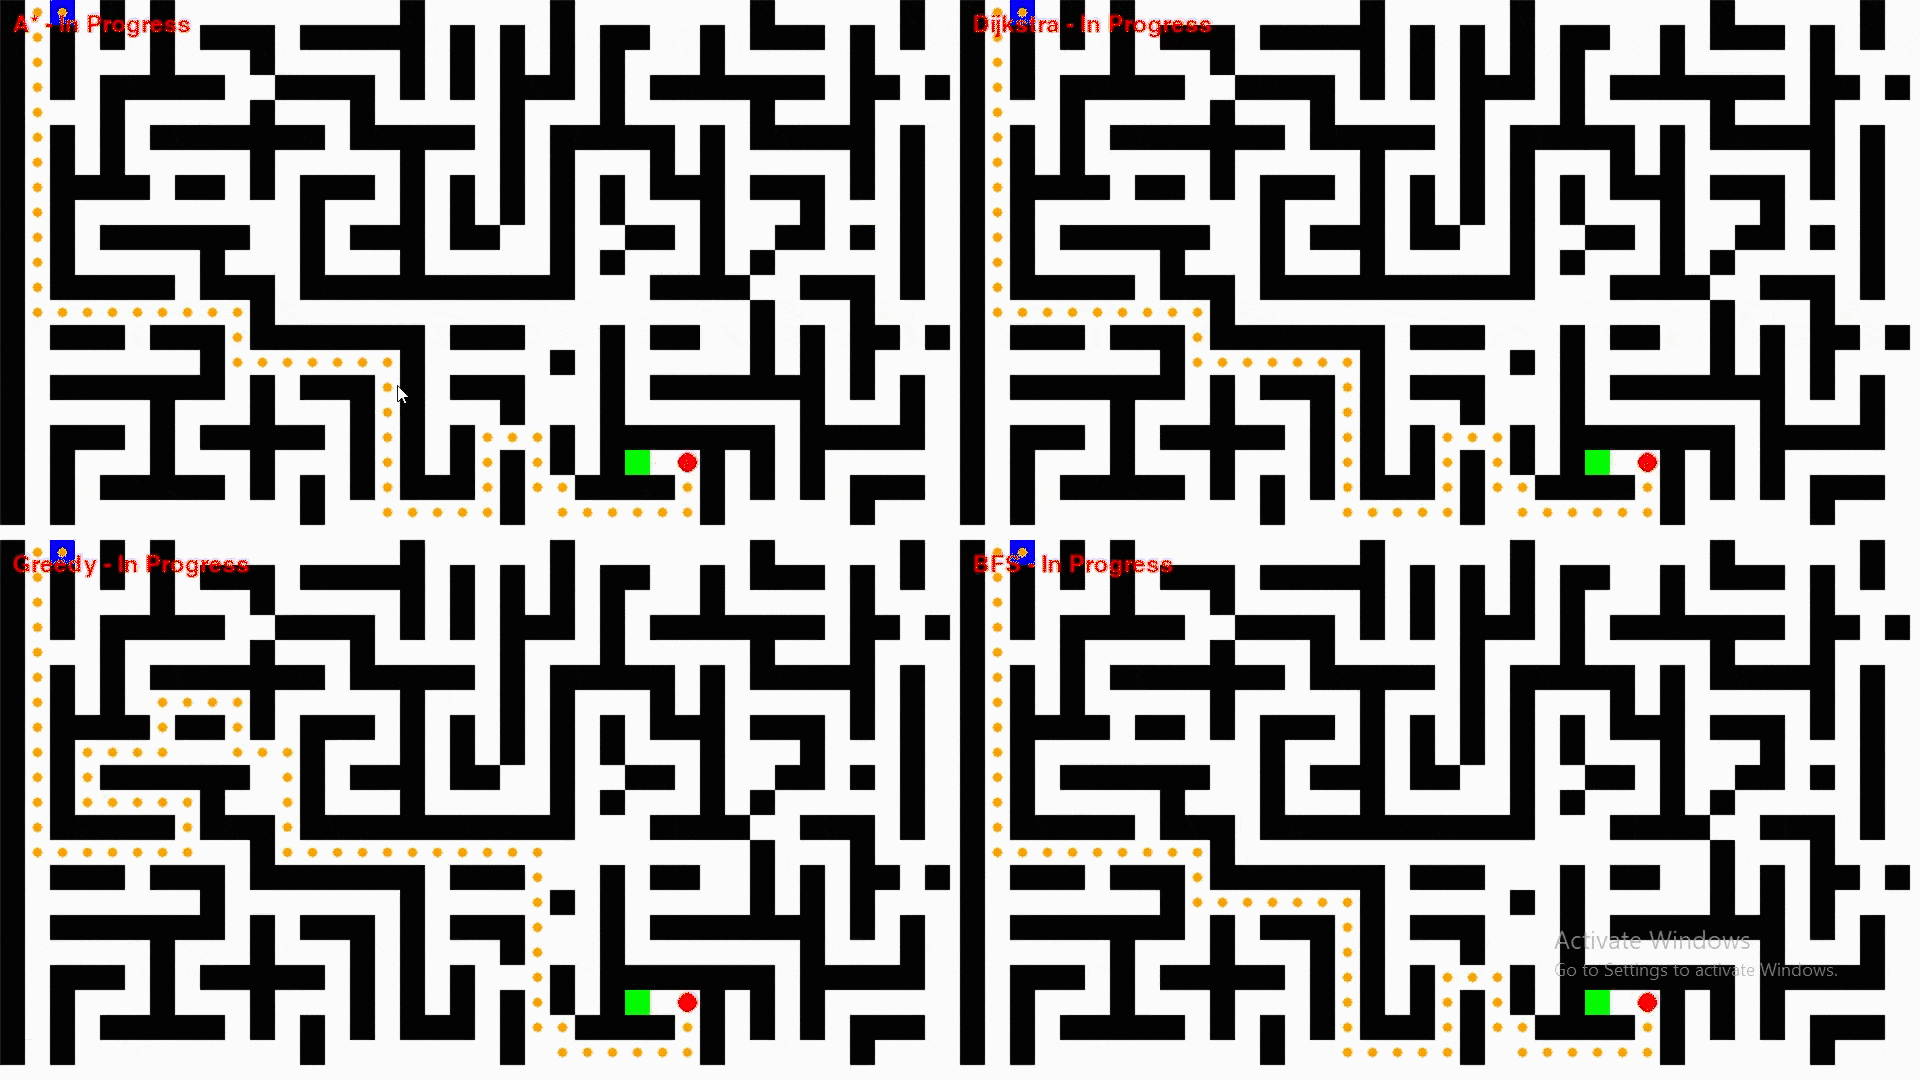